# Shadow Finder

In [272]:
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [273]:
# read in updated data set
data = pd.read_csv('nurve-landuse-0423.csv')
data.head()

,Unnamed: 0,ID,GPS_DATETIMESTAMP,GPS_LAT,GPS_LON,GPS_Speed,GPS_Alt,GPS_Sats,GPS_Fix,GPS_Quality,...,RDQ_AcZMin,RDQ_AcZMax,RDQ_AcZMea,sensor,timestamp,hourOfDay,minuteOfDay,minuteStretched,LU05_DESC,LUCODE
0,15,29309,2015-10-26 0:0:36.0,42.337547,-71.085525,17.28,10,8,1,10,...,6.8647,10.3166,8.6840,0,2015-10-26 00:00:36.000,0,0,0,Commercial,15
1,16,29311,2015-10-26 0:0:36.0,42.337547,-71.085525,17.28,10,8,1,10,...,8.0022,10.1205,8.8177,0,2015-10-26 00:00:36.000,0,0,0,Commercial,15
2,17,29313,2015-10-26 0:0:36.0,42.337547,-71.085525,17.28,10,8,1,10,...,6.6685,9.9636,8.6248,0,2015-10-26 00:00:36.000,0,0,0,Commercial,15
3,18,29315,2015-10-26 0:0:36.0,42.337547,-71.085525,17.28,10,8,1,10,...,7.5315,10.3558,8.8544,0,2015-10-26 00:00:36.000,0,0,0,Commercial,15
4,19,29317,2015-10-26 0:0:36.0,42.337547,-71.085525,17.28,10,8,1,10,...,7.9630,9.9636,9.1034,0,2015-10-26 00:00:36.000,0,0,0,Commercial,15


In [274]:
data.columns

Index([u'Unnamed: 0', u'ID', u'GPS_DATETIMESTAMP', u'GPS_LAT', u'GPS_LON',
       u'GPS_Speed', u'GPS_Alt', u'GPS_Sats', u'GPS_Fix', u'GPS_Quality',
       u'AMB_Temp', u'AMB_Humd', u'AMB_Lux', u'AMB_Snd', u'AMB_SndMin',
       u'AMB_SndMax', u'AMB_SndMea', u'RDQ_AcX', u'RDQ_AcXMin', u'RDQ_AcXMax',
       u'RDQ_AcXMea', u'RDQ_AcY', u'RDQ_AcYMin', u'RDQ_AcYMax', u'RDQ_AcYMea',
       u'RDQ_AcZ', u'RDQ_AcZMin', u'RDQ_AcZMax', u'RDQ_AcZMea', u'sensor',
       u'timestamp', u'hourOfDay', u'minuteOfDay', u'minuteStretched',
       u'LU05_DESC', u'LUCODE'],
      dtype='object')

In [275]:
# drop rows with a light value of -9998.0 
df = data[data.AMB_Lux != -9998.]
print 'Removing failed light readings, we still retain', np.round(float(len(df))/len(data)*100,2) ,'% of the data'

Removing failed light readings, we still retain 93.42 % of the data


In [276]:
# convert time stamp to datetime object, extract hour
df['GPS_DATETIMESTAMP'] = pd.to_datetime(df['GPS_DATETIMESTAMP'])
df['hour'] = df.GPS_DATETIMESTAMP.apply(lambda x: x.hour)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


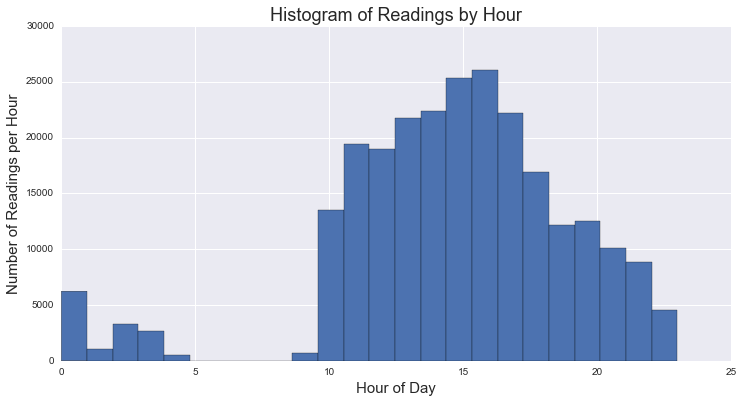

In [277]:
fig, ax = plt.subplots(figsize=(12,6))

plt.subplot(111)
plt.hist(df.hour, bins=24)
plt.title('Histogram of Readings by Hour', fontsize=18)
plt.xlabel('Hour of Day', fontsize = 15)
plt.ylabel('Number of Readings per Hour', fontsize=15)

In [279]:
# next calculate hourly thresholds for light
df.columns

Index([u'Unnamed: 0', u'ID', u'GPS_DATETIMESTAMP', u'GPS_LAT', u'GPS_LON',
       u'GPS_Speed', u'GPS_Alt', u'GPS_Sats', u'GPS_Fix', u'GPS_Quality',
       u'AMB_Temp', u'AMB_Humd', u'AMB_Lux', u'AMB_Snd', u'AMB_SndMin',
       u'AMB_SndMax', u'AMB_SndMea', u'RDQ_AcX', u'RDQ_AcXMin', u'RDQ_AcXMax',
       u'RDQ_AcXMea', u'RDQ_AcY', u'RDQ_AcYMin', u'RDQ_AcYMax', u'RDQ_AcYMea',
       u'RDQ_AcZ', u'RDQ_AcZMin', u'RDQ_AcZMax', u'RDQ_AcZMea', u'sensor',
       u'timestamp', u'hourOfDay', u'minuteOfDay', u'minuteStretched',
       u'LU05_DESC', u'LUCODE', u'hour', u'lux_flipped'],
      dtype='object')

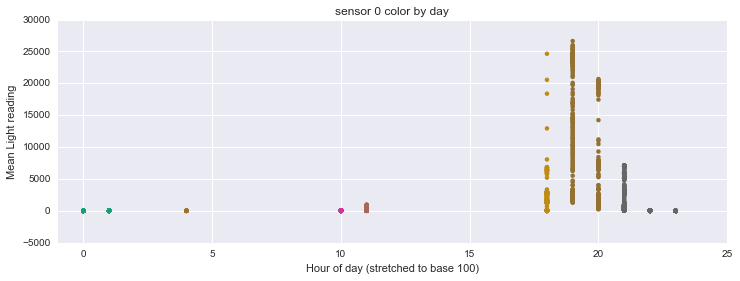

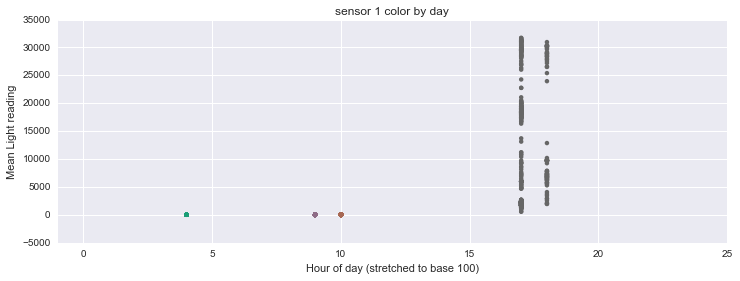

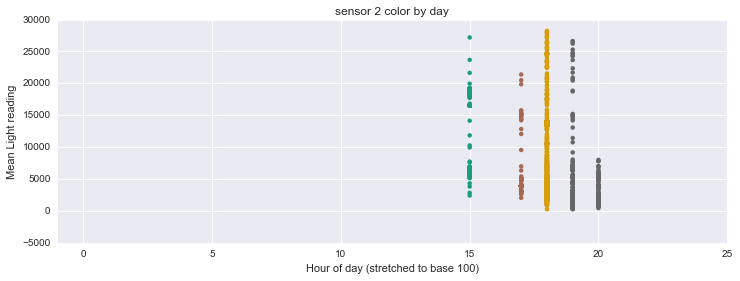

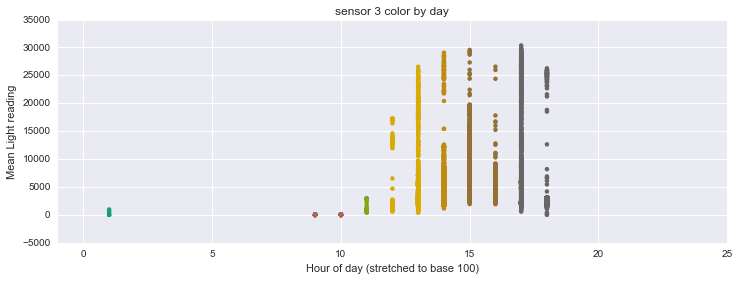

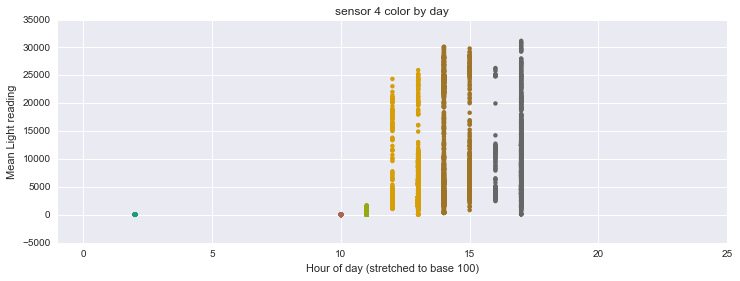

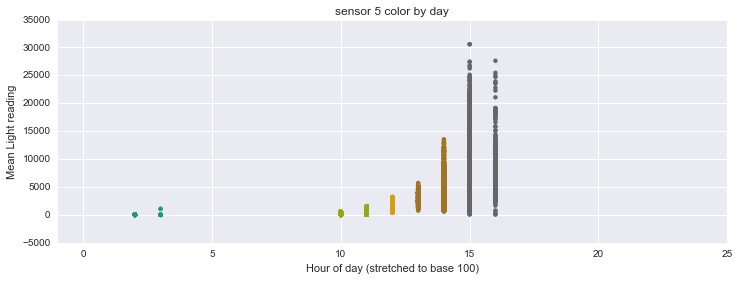

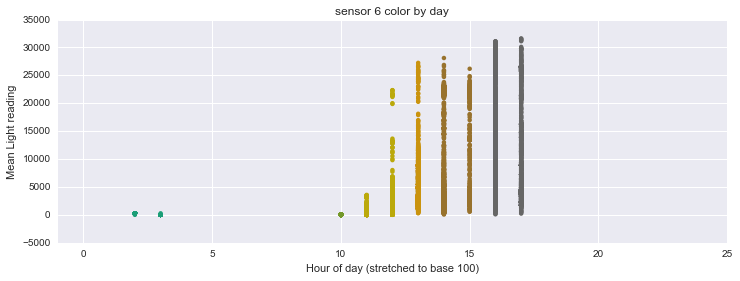

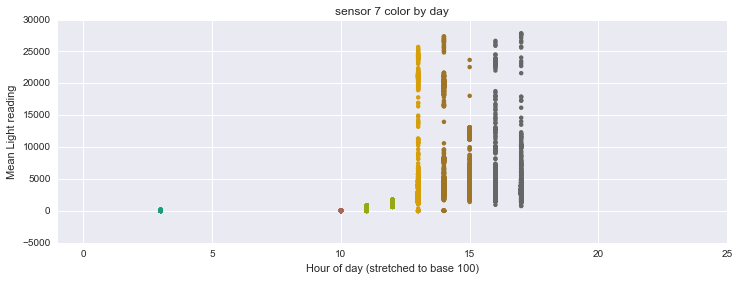

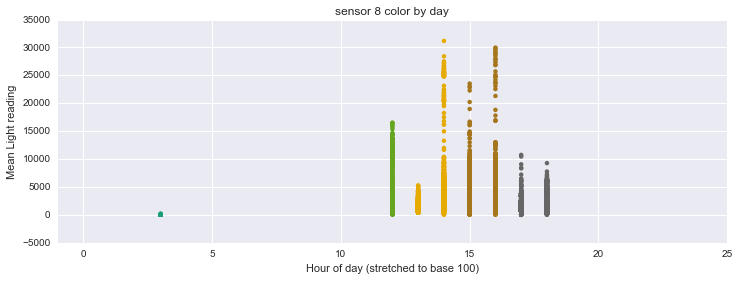

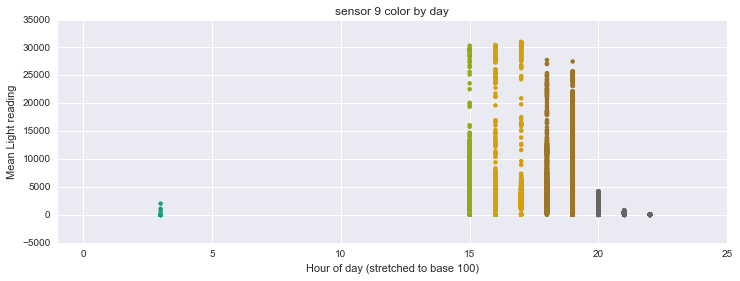

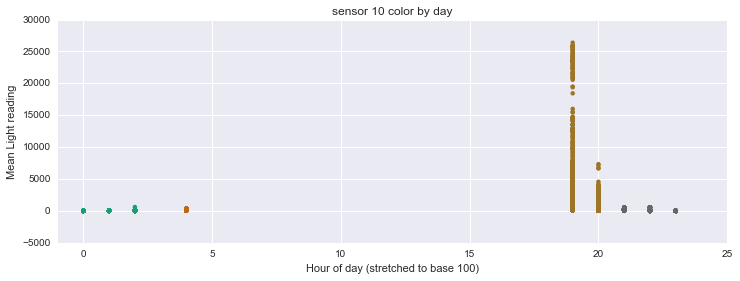

In [280]:
# plotting hourly distribution of sensor readings
for i in sorted(df.sensor.unique()):
    plt.figure(figsize=(12,4))
    plt.scatter(df.hour[df.sensor==i], df.AMB_Lux[df.sensor==i], linewidths=0, c=df.hour[df.sensor==i],
                cmap=plt.get_cmap('Dark2', len(df.hour[df.sensor==i].unique())))
    plt.xlabel('Hour of day (stretched to base 100)')
    plt.ylabel('Mean Light reading')
    plt.title('sensor {} color by day'.format(i))
    #plt.ylim(0,1000)
    plt.xlim(-1,25);

In [281]:
# light_thresh2 = []
# for h in df.hour.unique():
#     for i in df.sensor.unique():
#         temp = df[df.sensor==i, df.hour==h]
#         light_thresh2.append((i, np.percentile(temp.AMB_Lux, 10)))

In [282]:
# calculate the shadow threshold used for the flag variable to indicate shadows or unusual darkness
# 
light_thresh = []
for i in df.sensor.unique():
    temp = df[df.sensor==i]
    light_thresh.append((i, np.percentile(temp.AMB_Lux, 10)))

In [283]:
# dataframe below holds the threshold for shadow/not shadow flag variable
# merged with complete df, but we need to break it out by hour of the day first
light_thresh = pd.DataFrame(light_thresh, columns = ['sensor','threshold'])
light_thresh

,sensor,threshold
0,0,2
1,1,3
2,2,785
3,3,1932
4,4,21
5,5,4
6,6,5
7,7,18
8,8,484
9,9,15


In [284]:
# then merge light threshold into the big dataframe
df = df.merge(light_thresh, how='left')
df.head()

,Unnamed: 0,ID,GPS_DATETIMESTAMP,GPS_LAT,GPS_LON,GPS_Speed,GPS_Alt,GPS_Sats,GPS_Fix,GPS_Quality,...,sensor,timestamp,hourOfDay,minuteOfDay,minuteStretched,LU05_DESC,LUCODE,hour,lux_flipped,threshold
0,15,29309,2015-10-26 00:00:36,42.337547,-71.085525,17.28,10,8,1,10,...,0,2015-10-26 00:00:36.000,0,0,0,Commercial,15,0,-1,2
1,16,29311,2015-10-26 00:00:36,42.337547,-71.085525,17.28,10,8,1,10,...,0,2015-10-26 00:00:36.000,0,0,0,Commercial,15,0,-2,2
2,19,29317,2015-10-26 00:00:36,42.337547,-71.085525,17.28,10,8,1,10,...,0,2015-10-26 00:00:36.000,0,0,0,Commercial,15,0,-18,2
3,20,29319,2015-10-26 00:00:36,42.337547,-71.085525,17.28,10,8,1,10,...,0,2015-10-26 00:00:36.000,0,0,0,Commercial,15,0,-5,2
4,21,29321,2015-10-26 00:00:36,42.337547,-71.085525,17.28,10,8,1,10,...,0,2015-10-26 00:00:36.000,0,0,0,Commercial,15,0,-3,2
